In [1]:
import pandas as pd
import numpy as np
data_path="C:/Users/qw/PycharmProjects/dataanalysis_test/HomeCredit/data/"
application_train=pd.read_csv(data_path+"application_train.csv")
application_test=pd.read_csv(data_path+"application_test.csv")
print(application_train.shape)
print(application_test.shape)
print(application_train["TARGET"].value_counts())

(307511, 122)
(48744, 121)
0    282686
1     24825
Name: TARGET, dtype: int64


In [2]:
def missing_values_table(df):
    miss_val=df.isnull().sum()
    miss_val_percent=100*df.isnull().sum()/len(df)
    mis_val_table=pd.concat([miss_val,miss_val_percent],axis=1)
    mis_val_table_ren_columns=mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    return mis_val_table_ren_columns

In [21]:
mis_val_table=missing_values_table(application_train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


In [6]:
print(mis_val_table.head(10))

                          Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4


In [7]:
total=application_train.isnull().sum().sort_values(ascending=False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train=pd.concat([total,percent],axis=1,keys=["total","percent"])

In [8]:
print(missing_application_train.head(10))

                           total    percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953


In [9]:
type_count=application_train.dtypes.value_counts()
print(type_count)

float64    65
int64      41
object     16
dtype: int64


In [53]:
object_count=application_train.select_dtypes(include='object').apply(func=pd.Series.nunique, axis=0)
print(object_count)
print(len(object_count))

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
16


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in application_train:
    #print("col_name:",col)
    if application_train[col].dtype=='object':
        if len(list(application_train[col].unique()))<=2:
            le.fit(application_train[col])
            application_train[col]=le.fit_transform(application_train[col])
            application_test[col]=le.fit_transform(application_test[col])
            le_count+=1


In [8]:
print(application_train.shape)
application_train=pd.get_dummies(application_train)
print(application_train.shape)#(307511, 243)

(307511, 122)
(307511, 243)


In [9]:
print(application_test.shape)
application_test=pd.get_dummies(application_test)
print(application_test.shape)#(48744, 239)

(48744, 239)
(48744, 239)


In [10]:
from collections import Counter
print(Counter(application_train["TARGET"]))

Counter({0: 282686, 1: 24825})


In [23]:
print(len(train[:,:-1]),len(train_labels))

307511 307511


In [29]:
print(train.shape)

(307511, 239)


In [24]:
####采用降采样的方式
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_sample(train[:,:-1],train_labels)

In [ ]:
under_c=0
for d in X_rus:
    if d not in train[:,:-1]:
        print(d)
        under_c+=1
print(under_c)

In [26]:
print(X_rus.shape)
print(y_rus.shape)

(49650, 238)
(49650,)


In [30]:
print(Counter(y_rus))

Counter({0: 24825, 1: 24825})


In [25]:
#####采用重采样的方式
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)
X,y=smote.fit_sample(train[:,:-1],train_labels)

In [31]:
print(X.shape)
print(y.shape)
print(Counter(y))

(565372, 238)
(565372,)
Counter({1: 282686, 0: 282686})


In [ ]:
c=0
for data in X:
    if data not in train[:,:-1]:
        c+=1
        print(data)

In [29]:
for train_col in application_train.columns:
    if train_col not in application_test.columns:
        print(train_col)
# TARGET
# CODE_GENDER_XNA
# NAME_INCOME_TYPE_Maternity leave
# NAME_FAMILY_STATUS_Unknown

TARGET
CODE_GENDER_XNA
NAME_INCOME_TYPE_Maternity leave
NAME_FAMILY_STATUS_Unknown


In [ ]:
###由于进行onehot编码后，train和test的数据维度不一致，因此需要将train和test对齐起来

In [13]:
train_labels=application_train["TARGET"]

In [14]:
train,test=application_train.align(application_test,join="inner",axis=1)

In [15]:
train["TARGET"]=train_labels
print(train.shape)
print(test.shape)

(307511, 240)
(48744, 239)


In [16]:
from sklearn.preprocessing import MinMaxScaler,Imputer
if "TARGET" in train:
    train=train.drop(columns =["TARGET"])
else:
    train=train.copy()
features = list(train.columns)
test=test.copy()
imputer=Imputer(strategy='median')###缺失值的填充方式
scaler=MinMaxScaler(feature_range=(0,1))
imputer.fit(train)
train=imputer.transform(train)
test=imputer.transform(test)
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)
print(train.shape)
print(test.shape)

C:\Users\qw\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(307511, 239)
(48744, 239)


In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.0001)
lr.fit(train,train_labels)

C:\Users\qw\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [68]:
log_reg_pred = lr.predict(test)

In [69]:
print(log_reg_pred)

[0 0 0 ... 0 0 0]


In [ ]:
#####data explore analysis

In [36]:
(application_train["DAYS_BIRTH"]/-365).describe()##年龄属性看着基本没有异常值

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [37]:
application_train["DAYS_EMPLOYED"].describe()####最大值365243，明显存在异常值

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

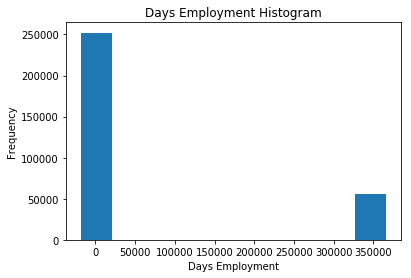

In [39]:
import matplotlib.pyplot as plt
application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [40]:
###对数据进行分组，分别查看具有缺失数据和无缺失数据对违约是否有差异
anom=application_train[application_train['DAYS_EMPLOYED']==365243]
non_anom=application_train[application_train['DAYS_EMPLOYED']!=365243]
print('The non-anomalies default on %0.2f%% of loans' % (100*non_anom["TARGET"].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 *anom["TARGET"].mean()))
print('There are %d anomalous days of employment' % len(anom))
print("异常值占比",100*len(anom)/len(application_train))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment
异常值占比 18.00716071945394


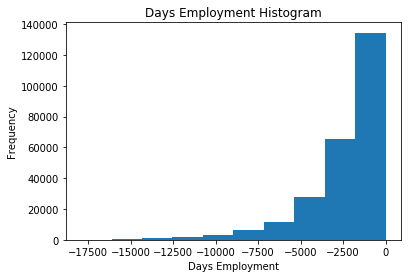

In [42]:
###对于异常值最安全的处理方式是保留为缺省或者使用np.nan替代
application_train["DAYS_EMPLOYED_ANOM"]=application_train['DAYS_EMPLOYED']==365243
application_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)
application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

There are 0 anomalies in the test data out of 48744 entries


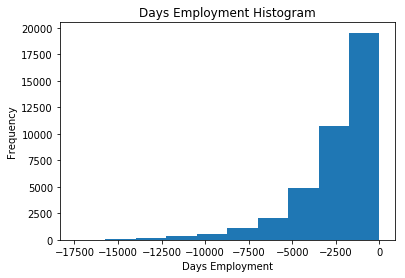

In [47]:
###对test数据做相同的变化
application_test["DAYS_EMPLOYED_ANOM"]=application_test['DAYS_EMPLOYED']==365243
application_test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)
application_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');
print('There are %d anomalies in the test data out of %d entries' % (application_test["DAYS_EMPLOYED_ANOM"].sum(), len(application_test)))

In [48]:
correlations = application_train.corr()['TARGET'].sort_values()
print(correlations.head(15))
print(correlations.tail(15))

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
REGION_POPULATION_RELATIVE             -0.037227
Name: TARGET, dtype: float64
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                    

In [52]:
application_train.shape
application_test.shape

(48744, 121)